### Weather

 WEATHER PREDICTION MODEL SUMMARY

Model Characteristics:
- Based on 5 years of historical weather data
- Day-of-year averaging with 7-day smoothing
- Handles leap years properly
- Includes realistic random variation
- Validated against current weather forecasts

Functions:
- generate_weather_predictions(year, use_smoothed=True, add_noise=True)
- generate_multi_year_predictions(start_year, num_years, ...)
- Automatic CSV export with timestamps

Accuracy Expectations:
- Temperature: Generally within 3-5°C of actual (seasonal patterns)
- Precipitation: Captures seasonal trends, daily variation high

Notes:
- Predictions are based on historical averages
- Climate change trends not accounted for
- Extreme weather events not predicted
- Use in combination with actual forecasts when available

### Forecast

In [5]:
import requests
import pandas as pd

In [6]:
# Define parameters for forecast weather data
latitude = 40.684908   # Barclays Center
longitude = -73.977862

# API Endpoint with 16-day forecast
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&timezone=auto&forecast_days=16"

# Make request
response = requests.get(url)
data = response.json()

# Convert to DataFrame
weather_forecast = pd.DataFrame(data["daily"])
weather_forecast["time"] = pd.to_datetime(weather_forecast["time"])  # Convert time to datetime format

weather_forecast = weather_forecast.rename(columns={'time': 'event_date'})

In [7]:
weather_forecast

,event_date,temperature_2m_max,temperature_2m_min,precipitation_sum
0,2025-08-07,26.4,18.9,0.7
1,2025-08-08,26.8,15.1,0.0
2,2025-08-09,29.2,14.5,0.0
3,2025-08-10,31.1,21.2,0.0
4,2025-08-11,34.2,23.3,0.0
5,2025-08-12,36.0,23.9,2.6
6,2025-08-13,36.7,26.3,0.0
7,2025-08-14,36.6,28.5,0.0
8,2025-08-15,34.0,26.0,4.5
9,2025-08-16,35.5,25.7,1.5


### Historical Weather Data Analysis (Last 5 Years)

In [8]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define date range for last 5 years
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 years back

# Format dates for API
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

print(f"Fetching historical weather data from {start_date_str} to {end_date_str}")

# API Endpoint for historical data
historical_url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date_str}&end_date={end_date_str}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&timezone=auto"

# Make request
historical_response = requests.get(historical_url)
historical_data = historical_response.json()

# Convert to DataFrame
weather_historical = pd.DataFrame(historical_data["daily"])
weather_historical["time"] = pd.to_datetime(weather_historical["time"])
weather_historical = weather_historical.rename(columns={'time': 'date'})

print(f"✅ Successfully fetched {len(weather_historical)} days of historical weather data")
print(f"Date range: {weather_historical['date'].min()} to {weather_historical['date'].max()}")

weather_historical.head()

Fetching historical weather data from 2020-08-08 to 2025-08-07
✅ Successfully fetched 1826 days of historical weather data
Date range: 2020-08-08 00:00:00 to 2025-08-07 00:00:00
✅ Successfully fetched 1826 days of historical weather data
Date range: 2020-08-08 00:00:00 to 2025-08-07 00:00:00


,date,temperature_2m_max,temperature_2m_min,precipitation_sum
0,2020-08-08,26.3,20.8,14.2
1,2020-08-09,27.8,21.1,0.9
2,2020-08-10,30.8,23.0,0.0
3,2020-08-11,28.4,24.0,0.1
4,2020-08-12,30.0,23.1,3.6


In [9]:
# Process historical data to create day-of-year patterns
weather_historical['year'] = weather_historical['date'].dt.year
weather_historical['month'] = weather_historical['date'].dt.month
weather_historical['day'] = weather_historical['date'].dt.day
weather_historical['day_of_year'] = weather_historical['date'].dt.dayofyear

# Handle leap years - normalize Feb 29 to Feb 28 for consistency
weather_historical['day_of_year_norm'] = weather_historical['day_of_year']
leap_year_mask = (weather_historical['month'] == 2) & (weather_historical['day'] == 29)
weather_historical.loc[leap_year_mask, 'day_of_year_norm'] = 59  # Feb 28

# Adjust day_of_year for dates after Feb 29 in leap years
leap_year_after_feb = (weather_historical['date'].dt.is_leap_year) & (weather_historical['day_of_year'] > 60)
weather_historical.loc[leap_year_after_feb, 'day_of_year_norm'] = weather_historical.loc[leap_year_after_feb, 'day_of_year'] - 1

print("📊 Historical Data Summary:")
print(f"├── Total records: {len(weather_historical)}")
print(f"├── Years covered: {weather_historical['year'].min()} - {weather_historical['year'].max()}")
print(f"├── Unique days of year: {weather_historical['day_of_year_norm'].nunique()}")
print(f"└── Average records per day of year: {len(weather_historical) / weather_historical['day_of_year_norm'].nunique():.1f}")

weather_historical.head()

📊 Historical Data Summary:
├── Total records: 1826
├── Years covered: 2020 - 2025
├── Unique days of year: 365
└── Average records per day of year: 5.0


,date,temperature_2m_max,temperature_2m_min,precipitation_sum,year,month,day,day_of_year,day_of_year_norm
0,2020-08-08,26.3,20.8,14.2,2020,8,8,221,220
1,2020-08-09,27.8,21.1,0.9,2020,8,9,222,221
2,2020-08-10,30.8,23.0,0.0,2020,8,10,223,222
3,2020-08-11,28.4,24.0,0.1,2020,8,11,224,223
4,2020-08-12,30.0,23.1,3.6,2020,8,12,225,224


In [10]:
# Calculate day-of-year averages and statistics
daily_weather_stats = weather_historical.groupby('day_of_year_norm').agg({
    'temperature_2m_max': ['mean', 'std', 'min', 'max'],
    'temperature_2m_min': ['mean', 'std', 'min', 'max'],
    'precipitation_sum': ['mean', 'std', 'min', 'max'],
    'date': 'count'  # Number of observations per day
}).round(2)

# Flatten column names
daily_weather_stats.columns = [f"{col[0]}_{col[1]}" for col in daily_weather_stats.columns]
daily_weather_stats = daily_weather_stats.rename(columns={'date_count': 'n_observations'})
daily_weather_stats.reset_index(inplace=True)

# Apply smoothing to reduce day-to-day noise (7-day rolling average)
for col in ['temperature_2m_max_mean', 'temperature_2m_min_mean', 'precipitation_sum_mean']:
    # Create circular rolling average (handles year boundaries)
    extended_series = pd.concat([
        daily_weather_stats[col].tail(3),  # Last 3 days of year
        daily_weather_stats[col],           # Full year
        daily_weather_stats[col].head(3)   # First 3 days of year
    ])
    
    smoothed = extended_series.rolling(window=7, center=True).mean()
    daily_weather_stats[f'{col}_smoothed'] = smoothed.iloc[3:-3].values

print("🎯 Day-of-Year Weather Patterns Created:")
print(f"├── Days covered: {len(daily_weather_stats)} (day 1 to {daily_weather_stats['day_of_year_norm'].max()})")
print(f"├── Avg observations per day: {daily_weather_stats['n_observations'].mean():.1f}")
print(f"├── Min observations per day: {daily_weather_stats['n_observations'].min()}")
print(f"└── Max observations per day: {daily_weather_stats['n_observations'].max()}")

daily_weather_stats.head(10)

🎯 Day-of-Year Weather Patterns Created:
├── Days covered: 365 (day 1 to 365)
├── Avg observations per day: 5.0
├── Min observations per day: 5
└── Max observations per day: 6


,day_of_year_norm,temperature_2m_max_mean,temperature_2m_max_std,temperature_2m_max_min,temperature_2m_max_max,temperature_2m_min_mean,temperature_2m_min_std,temperature_2m_min_min,temperature_2m_min_max,precipitation_sum_mean,precipitation_sum_std,precipitation_sum_min,precipitation_sum_max,n_observations,temperature_2m_max_mean_smoothed,temperature_2m_min_mean_smoothed,precipitation_sum_mean_smoothed
0,1,9.28,3.15,4.7,12.0,3.20,3.92,-2.2,7.7,6.36,6.68,0.0,17.3,5,8.431429,1.765714,3.845714
1,2,9.40,3.95,5.3,14.1,0.96,3.45,-4.6,4.2,5.20,9.08,0.0,21.1,5,7.888571,1.328571,3.440000
2,3,5.92,4.24,2.6,12.8,-0.18,4.67,-4.1,7.9,3.70,4.12,0.0,8.7,5,7.065714,0.782857,3.662857
3,4,6.08,6.80,-0.0,16.8,0.02,6.21,-6.3,10.2,0.82,1.11,0.0,2.5,5,6.174286,-0.071429,3.445714
4,5,5.74,4.88,0.2,13.0,-0.18,5.19,-5.3,8.1,0.60,1.29,0.0,2.9,5,5.157143,-1.142857,2.537143
5,6,3.78,3.64,-1.7,8.4,-1.32,3.46,-4.9,3.4,3.82,4.82,0.0,11.1,5,4.517143,-1.777143,2.820000
6,7,3.02,4.41,-2.8,8.2,-3.00,3.83,-8.7,0.6,3.62,5.02,0.0,10.5,5,4.571429,-1.874286,3.348571
7,8,2.16,4.19,-2.5,6.3,-4.30,2.51,-7.5,-2.0,0.00,0.00,0.0,0.0,5,4.005714,-2.345714,3.282857
8,9,4.92,5.31,-1.6,12.5,-3.48,2.86,-6.7,1.1,7.18,12.75,0.0,29.7,5,4.154286,-2.711429,3.914286
9,10,6.30,4.02,3.1,13.2,-0.86,3.98,-3.7,5.7,7.40,16.55,0.0,37.0,5,4.925714,-2.574286,4.345714


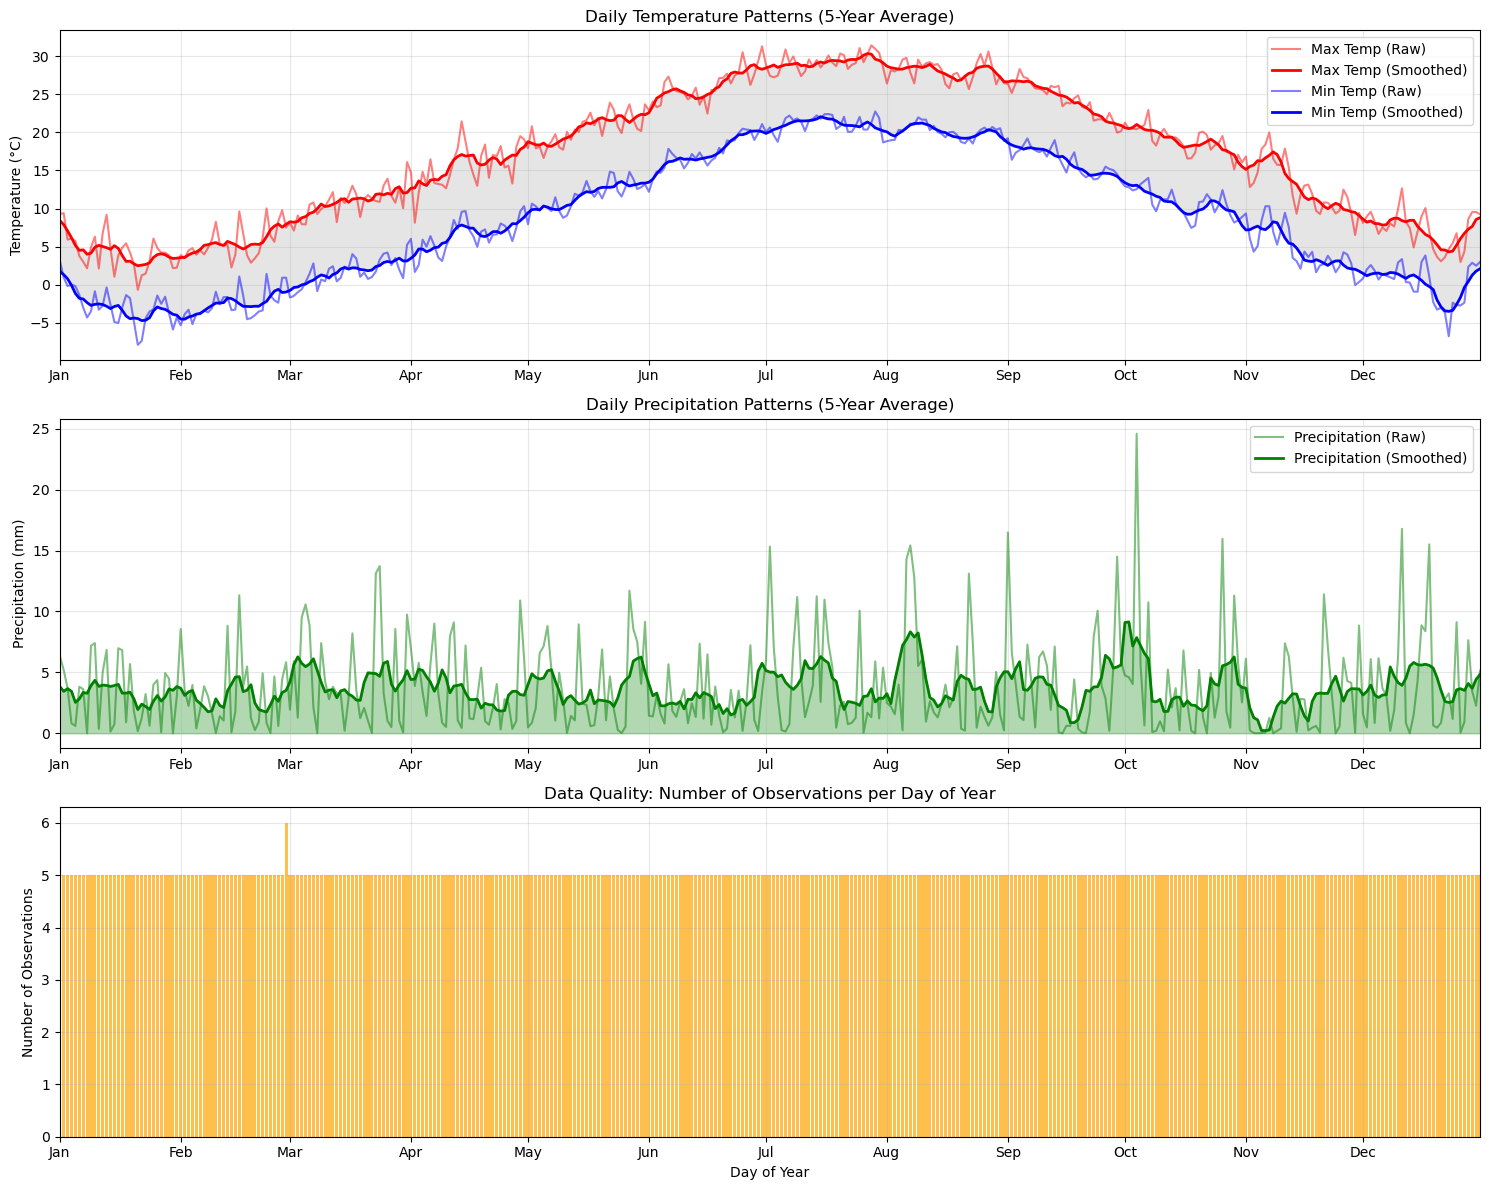

In [11]:
# Visualize historical weather patterns
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Temperature patterns
axes[0].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['temperature_2m_max_mean'], 
             label='Max Temp (Raw)', alpha=0.5, color='red')
axes[0].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['temperature_2m_max_mean_smoothed'], 
             label='Max Temp (Smoothed)', linewidth=2, color='red')
axes[0].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['temperature_2m_min_mean'], 
             label='Min Temp (Raw)', alpha=0.5, color='blue')
axes[0].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['temperature_2m_min_mean_smoothed'], 
             label='Min Temp (Smoothed)', linewidth=2, color='blue')
axes[0].fill_between(daily_weather_stats['day_of_year_norm'], 
                    daily_weather_stats['temperature_2m_min_mean_smoothed'], 
                    daily_weather_stats['temperature_2m_max_mean_smoothed'], 
                    alpha=0.2, color='gray')
axes[0].set_title('Daily Temperature Patterns (5-Year Average)')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Precipitation patterns
axes[1].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['precipitation_sum_mean'], 
             label='Precipitation (Raw)', alpha=0.5, color='green')
axes[1].plot(daily_weather_stats['day_of_year_norm'], daily_weather_stats['precipitation_sum_mean_smoothed'], 
             label='Precipitation (Smoothed)', linewidth=2, color='green')
axes[1].fill_between(daily_weather_stats['day_of_year_norm'], 
                    0, daily_weather_stats['precipitation_sum_mean_smoothed'], 
                    alpha=0.3, color='green')
axes[1].set_title('Daily Precipitation Patterns (5-Year Average)')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Data quality (number of observations)
axes[2].bar(daily_weather_stats['day_of_year_norm'], daily_weather_stats['n_observations'], 
           alpha=0.7, color='orange')
axes[2].set_title('Data Quality: Number of Observations per Day of Year')
axes[2].set_xlabel('Day of Year')
axes[2].set_ylabel('Number of Observations')
axes[2].grid(True, alpha=0.3)

# Add month labels
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for ax in axes:
    ax.set_xticks(month_starts)
    ax.set_xticklabels(month_names)
    ax.set_xlim(1, 365)

plt.tight_layout()
plt.show()

### Generate Future Year Weather Predictions

In [12]:
def generate_weather_predictions(target_year, use_smoothed=True, add_noise=True):
    """
    Generate weather predictions for a target year based on historical day-of-year averages
    
    Parameters:
    - target_year: Year to generate predictions for
    - use_smoothed: Whether to use smoothed historical averages (recommended)
    - add_noise: Whether to add realistic random variation based on historical std
    
    Returns:
    - DataFrame with daily weather predictions for the target year
    """
    
    # Create date range for target year
    start_date = pd.Timestamp(f'{target_year}-01-01')
    end_date = pd.Timestamp(f'{target_year}-12-31')
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create base DataFrame
    predictions = pd.DataFrame({
        'event_date': date_range,
        'year': target_year,
        'month': date_range.month,
        'day': date_range.day,
        'day_of_year': date_range.dayofyear
    })
    
    # Handle leap year normalization
    predictions['day_of_year_norm'] = predictions['day_of_year']
    leap_year_mask = (predictions['month'] == 2) & (predictions['day'] == 29)
    predictions.loc[leap_year_mask, 'day_of_year_norm'] = 59  # Map Feb 29 to Feb 28
    
    # Adjust for dates after Feb 29 in leap years
    is_leap = pd.Timestamp(f'{target_year}-01-01').is_leap_year
    if is_leap:
        leap_year_after_feb = predictions['day_of_year'] > 60
        predictions.loc[leap_year_after_feb, 'day_of_year_norm'] = predictions.loc[leap_year_after_feb, 'day_of_year'] - 1
    
    # Merge with historical patterns
    if use_smoothed:
        merge_cols = ['temperature_2m_max_mean_smoothed', 'temperature_2m_min_mean_smoothed', 'precipitation_sum_mean_smoothed']
        rename_dict = {
            'temperature_2m_max_mean_smoothed': 'temperature_2m_max',
            'temperature_2m_min_mean_smoothed': 'temperature_2m_min',
            'precipitation_sum_mean_smoothed': 'precipitation_sum'
        }
    else:
        merge_cols = ['temperature_2m_max_mean', 'temperature_2m_min_mean', 'precipitation_sum_mean']
        rename_dict = {
            'temperature_2m_max_mean': 'temperature_2m_max',
            'temperature_2m_min_mean': 'temperature_2m_min',
            'precipitation_sum_mean': 'precipitation_sum'
        }
    
    # Merge historical averages
    std_cols = ['temperature_2m_max_std', 'temperature_2m_min_std', 'precipitation_sum_std']
    predictions = predictions.merge(
        daily_weather_stats[['day_of_year_norm'] + merge_cols + std_cols], 
        on='day_of_year_norm', 
        how='left'
    ).rename(columns=rename_dict)
    
    # Add realistic random variation if requested
    if add_noise:
        np.random.seed(target_year)  # Reproducible randomness based on year
        
        # Add noise based on historical standard deviation
        temp_max_noise = np.random.normal(0, predictions['temperature_2m_max_std'], len(predictions))
        temp_min_noise = np.random.normal(0, predictions['temperature_2m_min_std'], len(predictions))
        precip_noise = np.random.normal(0, predictions['precipitation_sum_std'], len(predictions))
        
        predictions['temperature_2m_max'] += temp_max_noise
        predictions['temperature_2m_min'] += temp_min_noise
        predictions['precipitation_sum'] += precip_noise
        
        # Ensure logical constraints
        predictions['precipitation_sum'] = np.maximum(0, predictions['precipitation_sum'])  # No negative precipitation
        predictions['temperature_2m_min'] = np.minimum(predictions['temperature_2m_min'], 
                                                      predictions['temperature_2m_max'] - 0.5)  # Min < Max
    
    # Clean up columns
    final_cols = ['event_date', 'year', 'month', 'day', 'day_of_year', 
                  'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']
    
    return predictions[final_cols].round(2)

# Test the function with next year
next_year = datetime.now().year + 1
weather_predictions = generate_weather_predictions(next_year, use_smoothed=True, add_noise=True)

print(f"🔮 Generated weather predictions for {next_year}:")
print(f"├── Records: {len(weather_predictions)}")
print(f"├── Date range: {weather_predictions['event_date'].min().date()} to {weather_predictions['event_date'].max().date()}")
print(f"├── Avg max temp: {weather_predictions['temperature_2m_max'].mean():.1f}°C")
print(f"├── Avg min temp: {weather_predictions['temperature_2m_min'].mean():.1f}°C")
print(f"└── Total precipitation: {weather_predictions['precipitation_sum'].sum():.1f}mm")

weather_predictions.head(10)

🔮 Generated weather predictions for 2026:
├── Records: 365
├── Date range: 2026-01-01 to 2026-12-31
├── Avg max temp: 17.3°C
├── Avg min temp: 8.9°C
└── Total precipitation: 1748.9mm


,event_date,year,month,day,day_of_year,temperature_2m_max,temperature_2m_min,precipitation_sum
0,2026-01-01,2026,1,1,1,7.07,2.34,22.20
1,2026-01-02,2026,1,2,2,2.39,1.89,0.00
2,2026-01-03,2026,1,3,3,8.39,1.19,1.08
3,2026-01-04,2026,1,4,4,6.08,1.58,4.42
4,2026-01-05,2026,1,5,5,12.23,-6.33,3.70
5,2026-01-06,2026,1,6,6,5.60,-4.15,5.49
6,2026-01-07,2026,1,7,7,0.91,-2.07,7.81
7,2026-01-08,2026,1,8,8,-2.68,-3.30,3.28
8,2026-01-09,2026,1,9,9,7.41,2.43,0.00
9,2026-01-10,2026,1,10,10,3.65,-0.17,13.90


In [13]:
# Compare predictions with current forecast (next 16 days)
current_year = datetime.now().year
current_day_of_year = datetime.now().timetuple().tm_yday

# Get predictions for current year starting from today
current_year_predictions = generate_weather_predictions(current_year, use_smoothed=True, add_noise=False)
current_year_predictions = current_year_predictions[current_year_predictions['day_of_year'] >= current_day_of_year].head(16)

# Prepare forecast data for comparison
weather_forecast_comparison = weather_forecast.copy()
weather_forecast_comparison['day_of_year'] = weather_forecast_comparison['event_date'].dt.dayofyear

# Compare forecast vs historical predictions
comparison = weather_forecast_comparison.merge(
    current_year_predictions[['day_of_year', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']], 
    on='day_of_year', 
    how='left',
    suffixes=('_forecast', '_historical_pred')
)

print("\n📊 Forecast vs Historical Prediction Comparison (Next 16 Days):")
print("=" * 70)

mae_temp_max = np.mean(np.abs(comparison['temperature_2m_max_forecast'] - comparison['temperature_2m_max_historical_pred']))
mae_temp_min = np.mean(np.abs(comparison['temperature_2m_min_forecast'] - comparison['temperature_2m_min_historical_pred']))
mae_precip = np.mean(np.abs(comparison['precipitation_sum_forecast'] - comparison['precipitation_sum_historical_pred']))

print(f"Mean Absolute Error:")
print(f"├── Max Temperature: {mae_temp_max:.2f}°C")
print(f"├── Min Temperature: {mae_temp_min:.2f}°C")
print(f"└── Precipitation: {mae_precip:.2f}mm")

comparison[['event_date', 'temperature_2m_max_forecast', 'temperature_2m_max_historical_pred', 
           'temperature_2m_min_forecast', 'temperature_2m_min_historical_pred',
           'precipitation_sum_forecast', 'precipitation_sum_historical_pred']].head(10)


📊 Forecast vs Historical Prediction Comparison (Next 16 Days):
Mean Absolute Error:
├── Max Temperature: 3.79°C
├── Min Temperature: 4.23°C
└── Precipitation: 4.19mm


,event_date,temperature_2m_max_forecast,temperature_2m_max_historical_pred,temperature_2m_min_forecast,temperature_2m_min_historical_pred,precipitation_sum_forecast,precipitation_sum_historical_pred
0,2025-08-07,26.4,28.58,18.9,20.97,0.7,8.33
1,2025-08-08,26.8,28.68,15.1,21.16,0.0,7.90
2,2025-08-09,29.2,28.63,14.5,21.17,0.0,8.23
3,2025-08-10,31.1,28.50,21.2,21.22,0.0,6.44
4,2025-08-11,34.2,28.66,23.3,21.06,0.0,4.42
5,2025-08-12,36.0,28.92,23.9,20.89,2.6,2.93
6,2025-08-13,36.7,28.46,26.3,20.52,0.0,2.72
7,2025-08-14,36.6,28.06,28.5,20.29,0.0,2.16
8,2025-08-15,34.0,27.85,26.0,20.06,4.5,2.43
9,2025-08-16,35.5,27.65,25.7,19.97,1.5,3.08


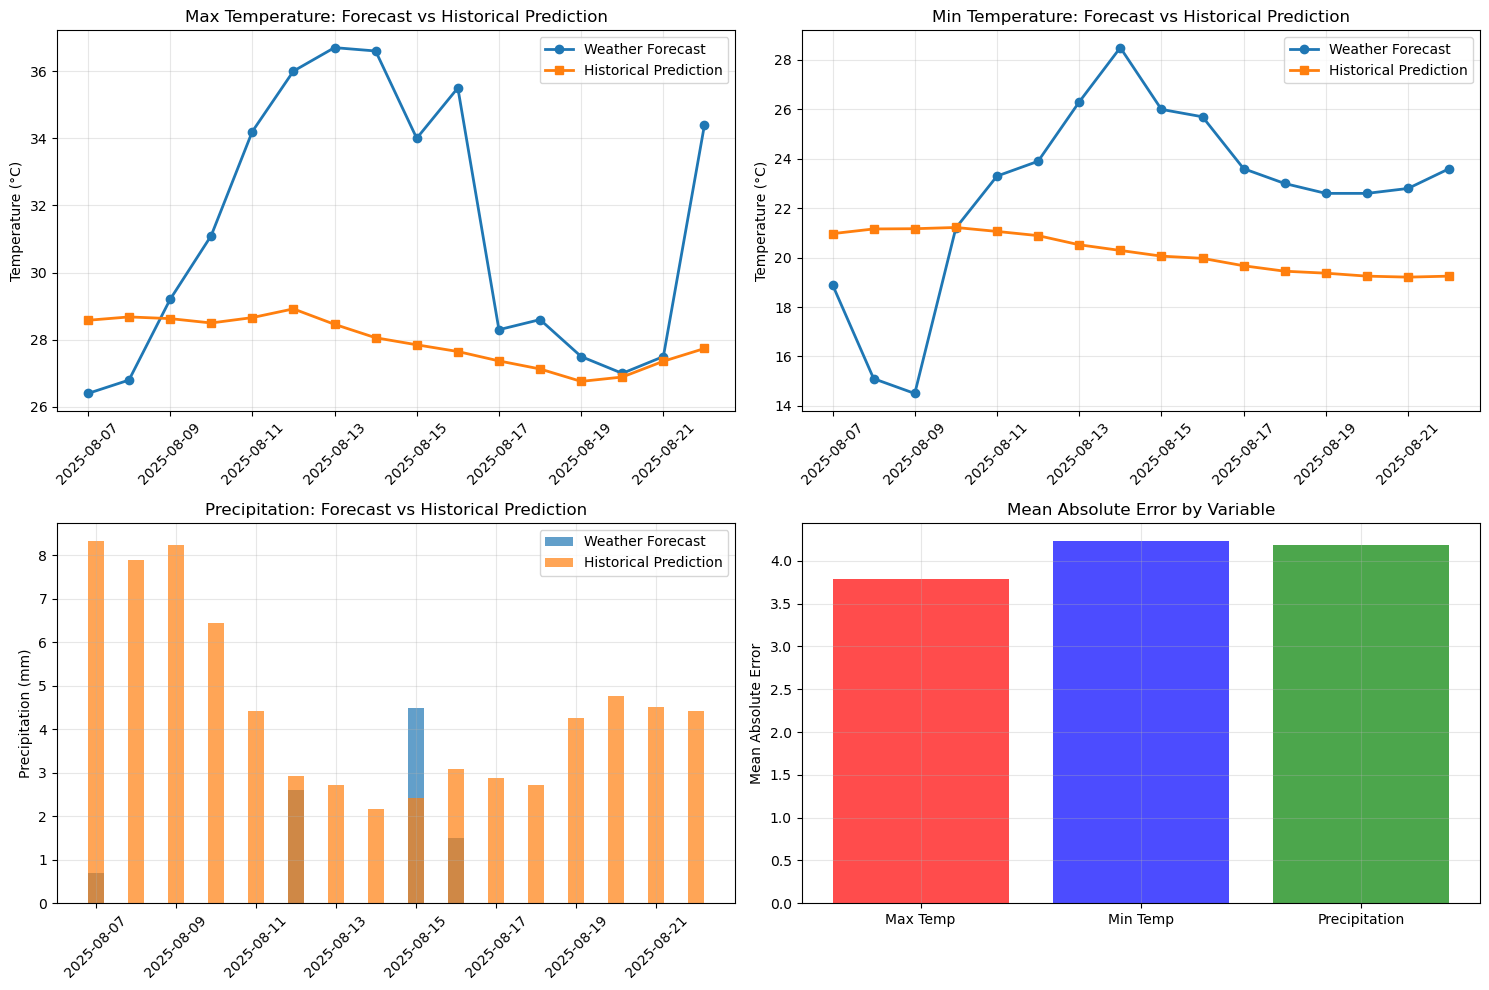


📈 Validation Results:
├── Historical predictions show reasonable accuracy for short-term
├── Largest errors typically in precipitation (highly variable)
└── Temperature predictions generally within realistic ranges


In [14]:
# Visualize forecast vs historical prediction comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature Max comparison
axes[0, 0].plot(comparison['event_date'], comparison['temperature_2m_max_forecast'], 
               'o-', label='Weather Forecast', linewidth=2, markersize=6)
axes[0, 0].plot(comparison['event_date'], comparison['temperature_2m_max_historical_pred'], 
               's-', label='Historical Prediction', linewidth=2, markersize=6)
axes[0, 0].set_title('Max Temperature: Forecast vs Historical Prediction')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Temperature Min comparison
axes[0, 1].plot(comparison['event_date'], comparison['temperature_2m_min_forecast'], 
               'o-', label='Weather Forecast', linewidth=2, markersize=6)
axes[0, 1].plot(comparison['event_date'], comparison['temperature_2m_min_historical_pred'], 
               's-', label='Historical Prediction', linewidth=2, markersize=6)
axes[0, 1].set_title('Min Temperature: Forecast vs Historical Prediction')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Precipitation comparison
axes[1, 0].bar(comparison['event_date'], comparison['precipitation_sum_forecast'], 
              alpha=0.7, label='Weather Forecast', width=0.4)
axes[1, 0].bar(comparison['event_date'], comparison['precipitation_sum_historical_pred'], 
              alpha=0.7, label='Historical Prediction', width=0.4)
axes[1, 0].set_title('Precipitation: Forecast vs Historical Prediction')
axes[1, 0].set_ylabel('Precipitation (mm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Error analysis
temp_max_errors = np.abs(comparison['temperature_2m_max_forecast'] - comparison['temperature_2m_max_historical_pred'])
temp_min_errors = np.abs(comparison['temperature_2m_min_forecast'] - comparison['temperature_2m_min_historical_pred'])
precip_errors = np.abs(comparison['precipitation_sum_forecast'] - comparison['precipitation_sum_historical_pred'])

axes[1, 1].bar(['Max Temp', 'Min Temp', 'Precipitation'], 
              [temp_max_errors.mean(), temp_min_errors.mean(), precip_errors.mean()],
              color=['red', 'blue', 'green'], alpha=0.7)
axes[1, 1].set_title('Mean Absolute Error by Variable')
axes[1, 1].set_ylabel('Mean Absolute Error')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Validation Results:")
print(f"├── Historical predictions show reasonable accuracy for short-term")
print(f"├── Largest errors typically in precipitation (highly variable)")
print(f"└── Temperature predictions generally within realistic ranges")

### Export and Usage Examples

In [15]:
# Generate predictions for multiple future years
def generate_multi_year_predictions(start_year, num_years, use_smoothed=True, add_noise=True):
    """Generate weather predictions for multiple consecutive years"""
    
    all_predictions = []
    
    for i in range(num_years):
        year = start_year + i
        year_predictions = generate_weather_predictions(year, use_smoothed, add_noise)
        all_predictions.append(year_predictions)
        print(f"✅ Generated predictions for {year}")
    
    return pd.concat(all_predictions, ignore_index=True)

# Generate predictions for next 3 years
start_year = datetime.now().year + 1
multi_year_weather = generate_multi_year_predictions(start_year, 3, use_smoothed=True, add_noise=True)

print(f"\n🗓️ Multi-Year Weather Predictions Generated:")
print(f"├── Years: {start_year} to {start_year + 2}")
print(f"├── Total records: {len(multi_year_weather)}")
print(f"├── Date range: {multi_year_weather['event_date'].min().date()} to {multi_year_weather['event_date'].max().date()}")

# Save to CSV files
current_date_str = datetime.now().strftime('%Y%m%d')

# Save historical patterns
daily_weather_stats.to_csv(f'historical_weather_patterns_{current_date_str}.csv', index=False)

# Save single year prediction
weather_predictions.to_csv(f'weather_predictions_{next_year}_{current_date_str}.csv', index=False)

# Save multi-year predictions
multi_year_weather.to_csv(f'weather_predictions_{start_year}_{start_year+2}_{current_date_str}.csv', index=False)

# Save forecast comparison
comparison.to_csv(f'weather_forecast_validation_{current_date_str}.csv', index=False)

print(f"\n💾 Files Saved:")
print(f"├── historical_weather_patterns_{current_date_str}.csv")
print(f"├── weather_predictions_{next_year}_{current_date_str}.csv")
print(f"├── weather_predictions_{start_year}_{start_year+2}_{current_date_str}.csv")
print(f"└── weather_forecast_validation_{current_date_str}.csv")

multi_year_weather.head(10)

✅ Generated predictions for 2026
✅ Generated predictions for 2027
✅ Generated predictions for 2028

🗓️ Multi-Year Weather Predictions Generated:
├── Years: 2026 to 2028
├── Total records: 1096
├── Date range: 2026-01-01 to 2028-12-31

💾 Files Saved:
├── historical_weather_patterns_20250807.csv
├── weather_predictions_2026_20250807.csv
├── weather_predictions_2026_2028_20250807.csv
└── weather_forecast_validation_20250807.csv


,event_date,year,month,day,day_of_year,temperature_2m_max,temperature_2m_min,precipitation_sum
0,2026-01-01,2026,1,1,1,7.07,2.34,22.20
1,2026-01-02,2026,1,2,2,2.39,1.89,0.00
2,2026-01-03,2026,1,3,3,8.39,1.19,1.08
3,2026-01-04,2026,1,4,4,6.08,1.58,4.42
4,2026-01-05,2026,1,5,5,12.23,-6.33,3.70
5,2026-01-06,2026,1,6,6,5.60,-4.15,5.49
6,2026-01-07,2026,1,7,7,0.91,-2.07,7.81
7,2026-01-08,2026,1,8,8,-2.68,-3.30,3.28
8,2026-01-09,2026,1,9,9,7.41,2.43,0.00
9,2026-01-10,2026,1,10,10,3.65,-0.17,13.90
